# sprint 機械学習スクラッチ 線形回帰

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias=None, verbose=None):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # self.coef_ = None とすることで、fitをを呼び出さなくてもcoefが使用できる（先にpredictやる時とか）
        # self/h0も同様

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # yの一次元化
        y = y.ravel()
        y_val = y_val.ravel()
        
        # 切片列を追加（切片の有無を選べる）
        if not self.bias:   
            X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)
            X_val = np.concatenate([np.ones([X_val.shape[0], 1]), X_val], axis=1)
        
        #パラメーターの初期値（平均０、分散１の正規分布）
        self.coef_ = np.random.normal(0, 1, X.shape[1])
        
        for iter_count in range(self.iter):
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の学習".format(iter_count))
            
            # 過程関数
            h0 = _linear_hypothesis(self, X)
            h0_val = _linear_hypothesis(self, X_val)
            # _linear_hypothesis　→　これだけでh0の更新、fit内部ではself.h0で更新後の値が呼び出せる、retunいらない
            
            # 最急降下法（error算出→勾配算出）
            error = h0 - y
            self.coef_ = _gradient_descent(self, X, error)
            # self._gradient_descent →　これだけでself.coef_の更新、fit内部ではself.coef_で更新後の値が呼び出せる、retunいらない
            
            # costの記録
            self.loss[iter_count] = loss_cal(h0 , y)
            self.val_loss[iter_count] = loss_cal(h0_val , y_val)
        

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        h0 = np.dot(X, self.coef_.T)
        
        return h0


# 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

In [3]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    
    Attributes
    ----------
      
    self.coef_ : 次の形のndarray, shape (n_features)
      Xに対するパラメーター

    Returns
    -------
    h0 : 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """

    h0 = np.dot(X, self.coef_.T)
    # coef_.Tでベクトルを転置すると予期せぬ結果が発生する
    # →　だからベクトルの内積時は次元追加の方が良い（newaxis or reshape）
    
    return h0

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [4]:
def _gradient_descent(self, X, error):
    """
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    
    error : 次の形のndarray, shape (n_samples, 1)
      trueとpredictの差
      
    self.lr : float
      学習率
    
    self.coef_ : 次の形のndarray, shape (n_features)
      Xに対するパラメーター
    
    Returns
    -------
    self.theta_ : 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
      
    """
    
    self.coef_ = self.coef_ - self.lr*np.dot(X.T, error)/X.shape[0]
    
    return self.coef_

# 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 hθ(x)の出力が推定結果です。

# 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

In [5]:
 def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = ((y_pred-y)**2).sum() / X.shape[0]

    return mse

# 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） J(θ)は次の式です。

In [6]:
def loss_cal(y_pred , y):
    """
    損失関数の計算と記録

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    cost : numpy.float
      平均二乗誤差
    """
    loss = ((y_pred-y)**2).sum() / X.shape[0] / 2
    
    return loss

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [10]:
# データセットの準備
df_origin = pd.read_csv("train.csv")
df = df_origin[["GrLivArea", "YearBuilt", "SalePrice"]]
X = df[["GrLivArea", "YearBuilt"]]
y = df[["SalePrice"]]

# 分割
from sklearn.model_selection import train_test_split
# ndarray変換
X_array = X.values
y_array = y.values
X_train, X_valid, y_train, y_valid = train_test_split(
    X_array, y_array, test_size=0.25, random_state=0)

# 各特徴量の標準化
# X、yを分けてインスタンス化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_std = scaler_X.fit_transform(X_train)
X_valid_std = scaler_X.transform(X_valid)
y_train_std = scaler_y.fit_transform(y_train)
y_valid_std = scaler_y.transform(y_valid)

## 対数などによる正規分布化は行なっていない

In [11]:
# スクラッチの学習
slrg = ScratchLinearRegression(5000, 0.001)
slrg.fit(X_train_std, y_train_std, X_valid_std, y_valid_std)

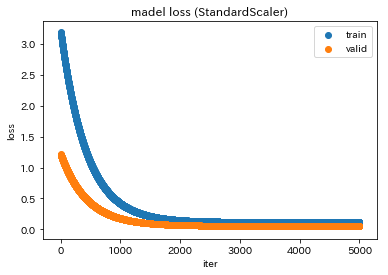

In [12]:
# グラフ化
iter_list = [i for i in range(slrg.iter)]
plt.scatter(iter_list, slrg.loss, label="train")
plt.scatter(iter_list, slrg.val_loss, label="valid")
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('madel loss (StandardScaler)')
plt.legend();

In [13]:
# 最終的なloss
print("trainのloss : {}".format(slrg.loss[-1]))
print("validのloss : {}".format(slrg.val_loss[-1]))

trainのloss : 0.12117250050293135
validのloss : 0.05506014224800889


# 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 θ0を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [14]:
# バイアス項なし、学習過程あり　学習
slrg_no_bai = ScratchLinearRegression(5000, 0.001, True, True)
slrg_no_bai.fit(X_train_std, y_train_std, X_valid_std, y_valid_std)

0回目の学習
1回目の学習
2回目の学習
3回目の学習
4回目の学習
5回目の学習
6回目の学習
7回目の学習
8回目の学習
9回目の学習
10回目の学習
11回目の学習
12回目の学習
13回目の学習
14回目の学習
15回目の学習
16回目の学習
17回目の学習
18回目の学習
19回目の学習
20回目の学習
21回目の学習
22回目の学習
23回目の学習
24回目の学習
25回目の学習
26回目の学習
27回目の学習
28回目の学習
29回目の学習
30回目の学習
31回目の学習
32回目の学習
33回目の学習
34回目の学習
35回目の学習
36回目の学習
37回目の学習
38回目の学習
39回目の学習
40回目の学習
41回目の学習
42回目の学習
43回目の学習
44回目の学習
45回目の学習
46回目の学習
47回目の学習
48回目の学習
49回目の学習
50回目の学習
51回目の学習
52回目の学習
53回目の学習
54回目の学習
55回目の学習
56回目の学習
57回目の学習
58回目の学習
59回目の学習
60回目の学習
61回目の学習
62回目の学習
63回目の学習
64回目の学習
65回目の学習
66回目の学習
67回目の学習
68回目の学習
69回目の学習
70回目の学習
71回目の学習
72回目の学習
73回目の学習
74回目の学習
75回目の学習
76回目の学習
77回目の学習
78回目の学習
79回目の学習
80回目の学習
81回目の学習
82回目の学習
83回目の学習
84回目の学習
85回目の学習
86回目の学習
87回目の学習
88回目の学習
89回目の学習
90回目の学習
91回目の学習
92回目の学習
93回目の学習
94回目の学習
95回目の学習
96回目の学習
97回目の学習
98回目の学習
99回目の学習
100回目の学習
101回目の学習
102回目の学習
103回目の学習
104回目の学習
105回目の学習
106回目の学習
107回目の学習
108回目の学習
109回目の学習
110回目の学習
111回目の学習
112回目の学習
113回目の学習
114回目の学習
115回目の学習
116回目の学習
117回目の学習
118回目の学習
119回目の学習
120回目の学習
121回目の学習
122回目の学習
123

1757回目の学習
1758回目の学習
1759回目の学習
1760回目の学習
1761回目の学習
1762回目の学習
1763回目の学習
1764回目の学習
1765回目の学習
1766回目の学習
1767回目の学習
1768回目の学習
1769回目の学習
1770回目の学習
1771回目の学習
1772回目の学習
1773回目の学習
1774回目の学習
1775回目の学習
1776回目の学習
1777回目の学習
1778回目の学習
1779回目の学習
1780回目の学習
1781回目の学習
1782回目の学習
1783回目の学習
1784回目の学習
1785回目の学習
1786回目の学習
1787回目の学習
1788回目の学習
1789回目の学習
1790回目の学習
1791回目の学習
1792回目の学習
1793回目の学習
1794回目の学習
1795回目の学習
1796回目の学習
1797回目の学習
1798回目の学習
1799回目の学習
1800回目の学習
1801回目の学習
1802回目の学習
1803回目の学習
1804回目の学習
1805回目の学習
1806回目の学習
1807回目の学習
1808回目の学習
1809回目の学習
1810回目の学習
1811回目の学習
1812回目の学習
1813回目の学習
1814回目の学習
1815回目の学習
1816回目の学習
1817回目の学習
1818回目の学習
1819回目の学習
1820回目の学習
1821回目の学習
1822回目の学習
1823回目の学習
1824回目の学習
1825回目の学習
1826回目の学習
1827回目の学習
1828回目の学習
1829回目の学習
1830回目の学習
1831回目の学習
1832回目の学習
1833回目の学習
1834回目の学習
1835回目の学習
1836回目の学習
1837回目の学習
1838回目の学習
1839回目の学習
1840回目の学習
1841回目の学習
1842回目の学習
1843回目の学習
1844回目の学習
1845回目の学習
1846回目の学習
1847回目の学習
1848回目の学習
1849回目の学習
1850回目の学習
1851回目の学習
1852回目の学習
1853回目の学習
1854回目の学習
1855回目の学習
1856回目の学習


3053回目の学習
3054回目の学習
3055回目の学習
3056回目の学習
3057回目の学習
3058回目の学習
3059回目の学習
3060回目の学習
3061回目の学習
3062回目の学習
3063回目の学習
3064回目の学習
3065回目の学習
3066回目の学習
3067回目の学習
3068回目の学習
3069回目の学習
3070回目の学習
3071回目の学習
3072回目の学習
3073回目の学習
3074回目の学習
3075回目の学習
3076回目の学習
3077回目の学習
3078回目の学習
3079回目の学習
3080回目の学習
3081回目の学習
3082回目の学習
3083回目の学習
3084回目の学習
3085回目の学習
3086回目の学習
3087回目の学習
3088回目の学習
3089回目の学習
3090回目の学習
3091回目の学習
3092回目の学習
3093回目の学習
3094回目の学習
3095回目の学習
3096回目の学習
3097回目の学習
3098回目の学習
3099回目の学習
3100回目の学習
3101回目の学習
3102回目の学習
3103回目の学習
3104回目の学習
3105回目の学習
3106回目の学習
3107回目の学習
3108回目の学習
3109回目の学習
3110回目の学習
3111回目の学習
3112回目の学習
3113回目の学習
3114回目の学習
3115回目の学習
3116回目の学習
3117回目の学習
3118回目の学習
3119回目の学習
3120回目の学習
3121回目の学習
3122回目の学習
3123回目の学習
3124回目の学習
3125回目の学習
3126回目の学習
3127回目の学習
3128回目の学習
3129回目の学習
3130回目の学習
3131回目の学習
3132回目の学習
3133回目の学習
3134回目の学習
3135回目の学習
3136回目の学習
3137回目の学習
3138回目の学習
3139回目の学習
3140回目の学習
3141回目の学習
3142回目の学習
3143回目の学習
3144回目の学習
3145回目の学習
3146回目の学習
3147回目の学習
3148回目の学習
3149回目の学習
3150回目の学習
3151回目の学習
3152回目の学習


4600回目の学習
4601回目の学習
4602回目の学習
4603回目の学習
4604回目の学習
4605回目の学習
4606回目の学習
4607回目の学習
4608回目の学習
4609回目の学習
4610回目の学習
4611回目の学習
4612回目の学習
4613回目の学習
4614回目の学習
4615回目の学習
4616回目の学習
4617回目の学習
4618回目の学習
4619回目の学習
4620回目の学習
4621回目の学習
4622回目の学習
4623回目の学習
4624回目の学習
4625回目の学習
4626回目の学習
4627回目の学習
4628回目の学習
4629回目の学習
4630回目の学習
4631回目の学習
4632回目の学習
4633回目の学習
4634回目の学習
4635回目の学習
4636回目の学習
4637回目の学習
4638回目の学習
4639回目の学習
4640回目の学習
4641回目の学習
4642回目の学習
4643回目の学習
4644回目の学習
4645回目の学習
4646回目の学習
4647回目の学習
4648回目の学習
4649回目の学習
4650回目の学習
4651回目の学習
4652回目の学習
4653回目の学習
4654回目の学習
4655回目の学習
4656回目の学習
4657回目の学習
4658回目の学習
4659回目の学習
4660回目の学習
4661回目の学習
4662回目の学習
4663回目の学習
4664回目の学習
4665回目の学習
4666回目の学習
4667回目の学習
4668回目の学習
4669回目の学習
4670回目の学習
4671回目の学習
4672回目の学習
4673回目の学習
4674回目の学習
4675回目の学習
4676回目の学習
4677回目の学習
4678回目の学習
4679回目の学習
4680回目の学習
4681回目の学習
4682回目の学習
4683回目の学習
4684回目の学習
4685回目の学習
4686回目の学習
4687回目の学習
4688回目の学習
4689回目の学習
4690回目の学習
4691回目の学習
4692回目の学習
4693回目の学習
4694回目の学習
4695回目の学習
4696回目の学習
4697回目の学習
4698回目の学習
4699回目の学習


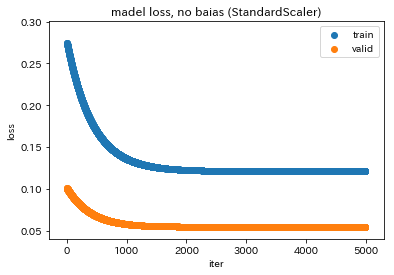

In [15]:
# グラフ化、バイアス項なし
iter_no_bai_list = [i for i in range(slrg_no_bai.iter)]
plt.scatter(iter_no_bai_list, slrg_no_bai.loss, label="train")
plt.scatter(iter_no_bai_list, slrg_no_bai.val_loss, label="valid")
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('madel loss, no baias (StandardScaler)')
plt.legend();

In [16]:
# 最終的なloss バイアス項なし
print("trainのloss : {}".format(slrg_no_bai.loss[-1]))
print("validのloss : {}".format(slrg_no_bai.val_loss[-1]))

trainのloss : 0.12114090376345137
validのloss : 0.05489791029833381


# 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

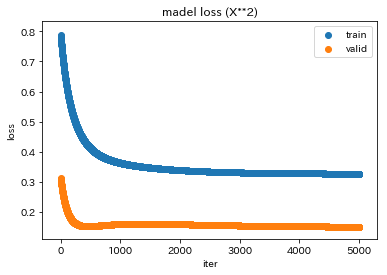

In [17]:
# 特徴量の２乗
slrg_poly2 = ScratchLinearRegression(5000, 0.001)
slrg_poly2.fit(X_train_std**2, y_train_std, X_valid_std**2, y_valid_std)

iter_poly2_list = [i for i in range(slrg_poly2.iter)]
plt.scatter(iter_poly2_list, slrg_poly2.loss, label="train")
plt.scatter(iter_poly2_list, slrg_poly2.val_loss, label="valid")
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('madel loss (X**2)')
plt.legend();

In [18]:
# 最終的なloss
print("trainのloss : {}".format(slrg_poly2.loss[-1]))
print("validのloss : {}".format(slrg_poly2.val_loss[-1]))

trainのloss : 0.32690274940721475
validのloss : 0.1505892012218275


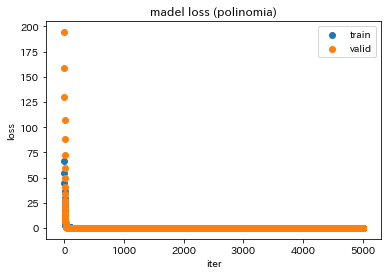

In [19]:
# 特徴量の３乗
slrg_poly3 = ScratchLinearRegression(5000, 0.001)
slrg_poly3.fit(X_train_std**3, y_train_std, X_valid_std**3, y_valid_std)

iter_poly3_list = [i for i in range(slrg_poly3.iter)]
plt.scatter(iter_poly3_list, slrg_poly3.loss, label="train")
plt.scatter(iter_poly3_list, slrg_poly3.val_loss, label="valid")
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('madel loss (polinomia)')
plt.legend();

In [20]:
# 最終的なloss
print("trainのloss : {}".format(slrg_poly3.loss[-1]))
print("validのloss : {}".format(slrg_poly3.val_loss[-1]))

trainのloss : 0.2904172031326921
validのloss : 0.23480708372249398


In [21]:
# それぞれの最終的なlossのまとめ
loss = [slrg.loss[-1], slrg.val_loss[-1]]
loss_no = [slrg_no_bai.loss[-1], slrg_no_bai.val_loss[-1]]
loss_poly2 = [slrg_poly2.loss[-1], slrg_poly2.val_loss[-1]]
loss_poly3 = [slrg_poly3.loss[-1], slrg_poly3.val_loss[-1]]

loss_df = pd.DataFrame([loss, loss_no, loss_poly2, loss_poly3],
                      index=['通常', 'バイアスなし', '２乗', '３乗'],
                      columns=['train', 'valid'])
loss_df

,train,valid
通常,0.121173,0.055060
バイアスなし,0.121141,0.054898
２乗,0.326903,0.150589
３乗,0.290417,0.234807


特徴量をべき乗すると最終的なlossが大きい（収束するのは早いが）  
→べき乗にするとグラフではどうなる？

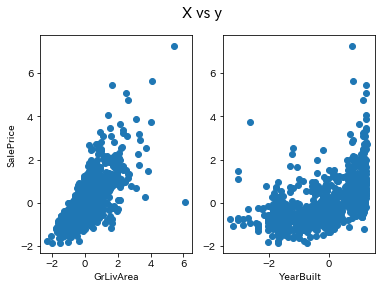

In [22]:
# poly前のグラフ
plt.figure().suptitle("X vs y", size=15)
plt.subplot(121)
plt.scatter(X_train_std[:, 0], y_train_std)
plt.xlabel(X.columns[0])
plt.ylabel(y.columns[0])
plt.subplot(122)
plt.scatter(X_train_std[:, 1], y_train_std)
plt.xlabel(X.columns[1]);

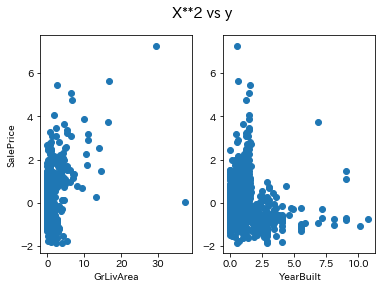

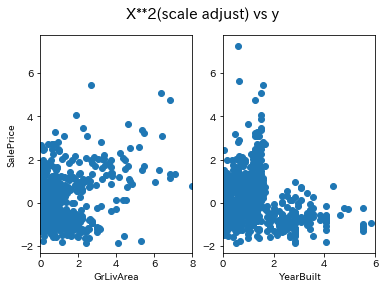

In [23]:
# ２乗のグラフ
plt.figure().suptitle("X**2 vs y", size=15)
plt.subplot(121)
plt.scatter(X_train_std[:, 0]**2, y_train_std)
plt.xlabel(X.columns[0])
plt.ylabel(y.columns[0])
plt.subplot(122)
plt.scatter(X_train_std[:, 1]**2, y_train_std)
plt.xlabel(X.columns[1])

# ２乗のグラフ　スケールを調整
plt.figure().suptitle("X**2(scale adjust) vs y", size=15)
plt.subplot(121)
plt.scatter(X_train_std[:, 0]**2, y_train_std)
plt.xlim(0, 8)
plt.xlabel(X.columns[0])
plt.ylabel(y.columns[0])
plt.subplot(122)
plt.scatter(X_train_std[:, 1]**2, y_train_std)
plt.xlim(0, 6)
plt.xlabel(X.columns[1]);

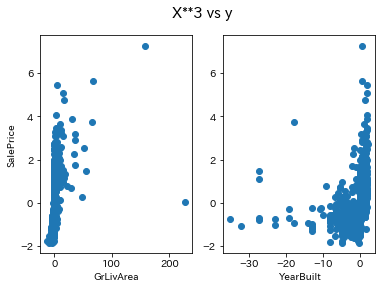

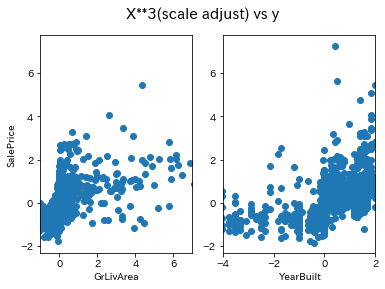

In [24]:
# 3乗のグラフ
plt.figure().suptitle("X**3 vs y", size=15)
plt.subplot(121)
plt.scatter(X_train_std[:, 0]**3, y_train_std)
plt.xlabel(X.columns[0])
plt.ylabel(y.columns[0])
plt.subplot(122)
plt.scatter(X_train_std[:, 1]**3, y_train_std)
plt.xlabel(X.columns[1])

# ２乗のグラフ　スケールを調整
plt.figure().suptitle("X**3(scale adjust) vs y", size=15)
plt.subplot(121)
plt.scatter(X_train_std[:, 0]**3, y_train_std)
plt.xlim(-1, 7)
plt.xlabel(X.columns[0])
plt.ylabel(y.columns[0])
plt.subplot(122)
plt.scatter(X_train_std[:, 1]**3, y_train_std)
plt.xlim(-4, 2)
plt.xlabel(X.columns[1]);

特徴量をべき乗することで分布が疎になる（外れ値が増える）  
線型性も減少している  
→そのため最終的なlossも高くなる（線型性の低下）

# 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

目的関数である損失関数は、変数に対する２乗の関数。  
そのため、２乗の関数は局所最適解を持たないため必ず最適解が求められる。